In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [2]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
item_num=0
for f in data.keys():
    if '.csv0' in f:
        pass
    else:
        item_num+=1
        data[f]=np.load('./results/'+f+'/K.npy',allow_pickle=True)
print(item_num)

66


In [3]:
def dis(K1,K2,sele_n):
    if sele_n=='L1':
        # L1
        dis=np.sum(np.abs(K1-K2))/(K1.shape[0]*K1.shape[1])
    elif sele_n=='LF': 
        # LF
        dis=np.sum(np.square(K1-K2))/(K1.shape[0]*K1.shape[1])
    else:
        # LS
        K=np.abs(K1-K2)
        U,s,V=np.linalg.svd(K)
        dis=np.sqrt(np.sum(np.square(s)))/(K1.shape[0])
    return dis

In [4]:
dis_matL1 = np.zeros((item_num,item_num))
dis_matLF = np.zeros((item_num,item_num))
dis_matL2 = np.zeros((item_num,item_num))
sele_n='LF'
it,jt=0,0
for f1 in data.keys():
    if '.csv0' in f1:
        pass
    else:
        for f2 in data.keys():
            if '.csv0' in f2:
                pass
            else:
                dis_matL1[it,jt] = dis(data[f1],data[f2],'L1')
                dis_matLF[it,jt] = dis(data[f1],data[f2],'LF')
                dis_matL2[it,jt] = dis(data[f1],data[f2],'L2')
                jt+=1
        it+=1
        jt=0
    

/Users/tianwenchong/Desktop/Text12-Koopman-WQ


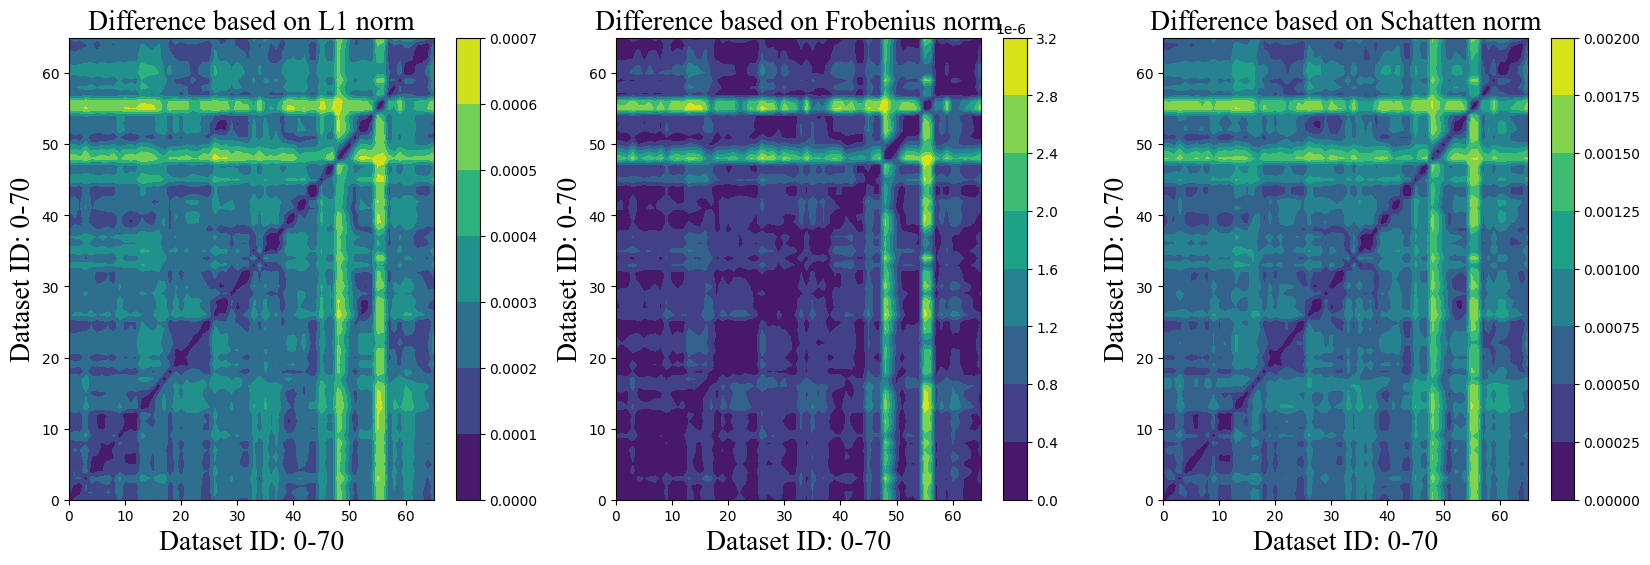

In [5]:
font1={'family':'Times New Roman','weight':'normal','size':20}
font2={'family':'Times New Roman','weight':'normal','size':6}
fig,ax=plt.subplots(1,3,figsize=(20,6))

h1=ax[0].contourf(dis_matL1)
#ax[0].set_xticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2,rotation=90)
#ax[0].set_yticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2)
ax[0].set_title('Difference based on L1 norm',font=font1)
ax[0].set_ylabel('Dataset ID: 0-70',font=font1)
ax[0].set_xlabel('Dataset ID: 0-70',font=font1)
cb1=plt.colorbar(h1)
cb1.ax.tick_params(labelsize=10)

h2=ax[1].contourf(dis_matLF)
#ax[1].set_xticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2,rotation=90)
#ax[1].set_yticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2)
ax[1].set_title('Difference based on Frobenius norm',font=font1)
ax[1].set_ylabel('Dataset ID: 0-70',font=font1)
ax[1].set_xlabel('Dataset ID: 0-70',font=font1)
cb2=plt.colorbar(h2)
cb2.ax.tick_params(labelsize=10)

h3=ax[2].contourf(dis_matL2)
#ax[2].set_xticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2,rotation=90)
#ax[2].set_yticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2)
ax[2].set_title('Difference based on Schatten norm',font=font1)
ax[2].set_ylabel('Dataset ID: 0-70',font=font1)
ax[2].set_xlabel('Dataset ID: 0-70',font=font1)
cb3=plt.colorbar(h3)
cb3.ax.tick_params(labelsize=10)

os.chdir(os.path.pardir)
print(os.getcwd())
plt.savefig('./fig6.tif',dpi=100)
os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman')


/Users/tianwenchong/Desktop/Text12-Koopman-WQ
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
/Users/tianwenchong/Desktop/Text12-Koopman-WQ


<Figure size 640x480 with 0 Axes>

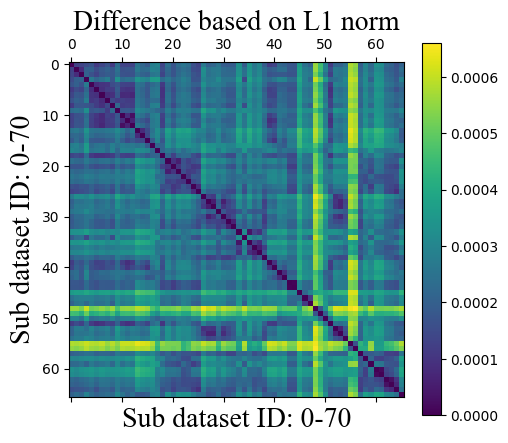

<Figure size 640x480 with 0 Axes>

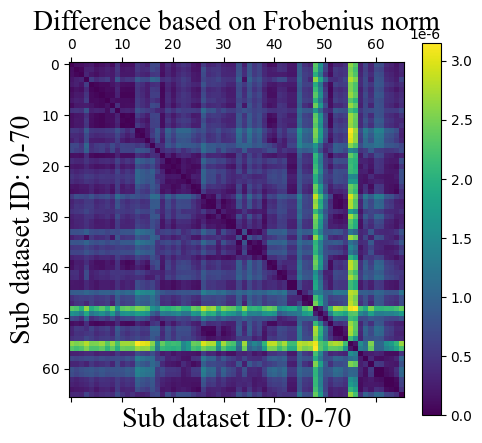

<Figure size 640x480 with 0 Axes>

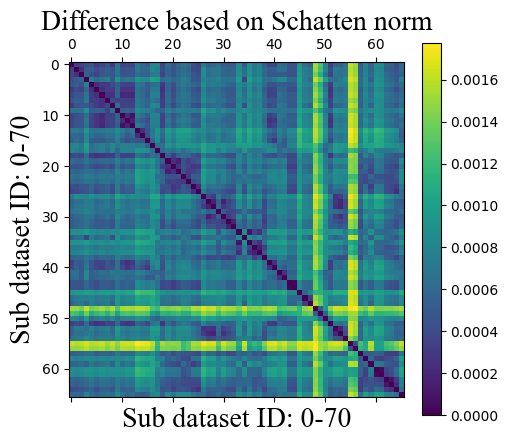

In [6]:
font1={'family':'Times New Roman','weight':'normal','size':20}
font2={'family':'Times New Roman','weight':'normal','size':10}
#fig,ax=plt.subplots(1,3,figsize=(20,6))

for k in range(3):
    plt.figure()
    if k == 0:
        h1=plt.matshow(dis_matL1)
        plt.title('Difference based on L1 norm',font=font1)
    elif k == 1:
        h1=plt.matshow(dis_matLF)
        plt.title('Difference based on Frobenius norm',font=font1)
    else:
        h1=plt.matshow(dis_matL2)
        plt.title('Difference based on Schatten norm',font=font1)
    #ax[0].set_xticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2,rotation=90)
    #ax[0].set_yticks([i-0.0 for i in range(item_num-1,-1,-1)],['Data'+str(i) for i in range(item_num,0,-1)],font=font2)
    
    plt.ylabel('Sub dataset ID: 0-70',font=font1)
    plt.xlabel('Sub dataset ID: 0-70',font=font1)
    cb1=plt.colorbar(h1,fraction=0.05, pad=0.05)
    cb1.set_label('',fontdict=font2)
    #cb1.tick_params(labelsize=10)

    os.chdir(os.path.pardir)
    print(os.getcwd())
    plt.savefig('./fig6-'+str(k)+'.tif',bbox_inches = 'tight',dpi=200)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman')


font1={'family':'Times New Roman','weight':'normal','size':20}
font2={'family':'Times New Roman','weight':'normal','size':6}
plt.figure(figsize=(6,6))

sns.heatmap(data=dis_matL1,
            xticklabels=['Data'+str(i) for i in range(42,0,-1)] , #x轴方向刻度标签开关、赋值，可选“auto”, bool, list-like（传入列表）, or int,
            yticklabels=['Data'+str(i) for i in range(42,0,-1)], #y轴方向刻度标签开关、同x轴
         )
plt.title("Difference based on L1 norm")


# KL test

data = np.load('./databygroup.npy',allow_pickle=True).tolist()
TrainData,TestData={},{}
for k in data.keys():
    if '.csv0' in k:
        TrainData[k]=data[k]
    else:
        TestData[k]=data[k]

k=0
for f in data.keys():
   k+=1
print(k) 

dis_matL1 = np.zeros((k,k))
sele_n='LF'
it,jt=0,0
for f1 in data.keys():
    if 'DS_Store' in f1:
        pass
    else:
        for f2 in data.keys():
            if 'DS_Store' in f2:
                pass
            else:
                p = scipy.stats.relfreq(data[f1], numbins=10).frequency
                q = scipy.stats.relfreq(data[f2], numbins=10).frequency
                dis_matL1[it,jt] = scipy.stats.entropy(p,q)
                jt+=1
        it+=1
        jt=0


font1={'family':'Times New Roman','weight':'normal','size':20}
h=plt.matshow(dis_matL1)
plt.xticks([],[],font=font1)
plt.yticks([],[],font=font1)
cb=plt.colorbar(h)
cb.ax.tick_params(labelsize=12)